In [2]:
from keras.layers import Input, Dense
from keras import regularizers
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
file = r'carbon_nanotubes.csv'
df = pd.read_csv(file, delimiter=';', header=None, decimal=',')
x_train = df.drop([0,1], axis=1).values
x_train.shape

(10722, 6)

In [4]:
# # sanity check to make sure it works

# from keras.datasets import mnist
# import numpy as np
# (x_train, _), (x_test, _) = mnist.load_data()

# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# print(x_train.shape)
# print(x_test.shape)

11468800/11490434 [============================>.] - ETA: 0s(60000, 784)
(10000, 784)


![title](img/multi.png)

In [8]:
input_size = 6
hidden_size = 4
coded_size = 3

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
coded =Dense(coded_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(coded)
r = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(inputs=x, outputs=r)
encoder = Model(inputs=x, outputs=coded)

### create model to decoder
# retrieve the last layer of the autoencoder model. This the latent vector already IT.
# just have to add a shape IT. 
decoder_input = Input(shape=(coded_size,))
next_input = decoder_input

# the next_input keeps looping getting carried into the next layer as the data vector IT.
for layer in autoencoder.layers[-2:]:
    next_input = layer(next_input)
    
decoder = Model(inputs=decoder_input, outputs=next_input)

In [9]:
autoencoder.compile(optimizer='adam', loss='mse')

epochs=20
batch_size=256

fitted_history = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True)

Epoch 1/20
10721/10721 [==============================] - 0s 43us/step - loss: 0.0846
Epoch 2/20
10721/10721 [==============================] - 0s 15us/step - loss: 0.0833
Epoch 3/20
10721/10721 [==============================] - 0s 16us/step - loss: 0.0826
Epoch 4/20
10721/10721 [==============================] - 0s 14us/step - loss: 0.0799
Epoch 5/20
10721/10721 [==============================] - 0s 15us/step - loss: 0.0745
Epoch 6/20
10721/10721 [==============================] - 0s 15us/step - loss: 0.0688
Epoch 7/20
10721/10721 [==============================] - 0s 15us/step - loss: 0.0642
Epoch 8/20
10721/10721 [==============================] - 0s 15us/step - loss: 0.0606
Epoch 9/20
10721/10721 [==============================] - 0s 15us/step - loss: 0.0579
Epoch 10/20
10721/10721 [==============================] - 0s 14us/step - loss: 0.0557
Epoch 11/20
10721/10721 [==============================] - 0s 14us/step - loss: 0.0539
Epoch 12/20
10721/10721 [===========================

dict_keys(['loss'])


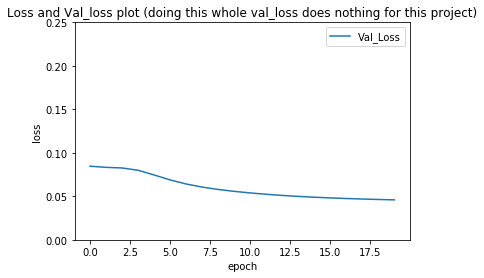

In [10]:
print(fitted_history.history.keys())

plt.plot(fitted_history.history['loss'])
#plt.plot(fitted_history.history['val_loss'])
plt.ylim(0,.25)
plt.title('Loss and Val_loss plot (doing this whole val_loss does nothing for this project)')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Val_Loss', 'Loss'])

In [11]:
# predictions
encoded_train = encoder.predict(x_train)
decoded_imgs = decoder.predict(encoded_train)

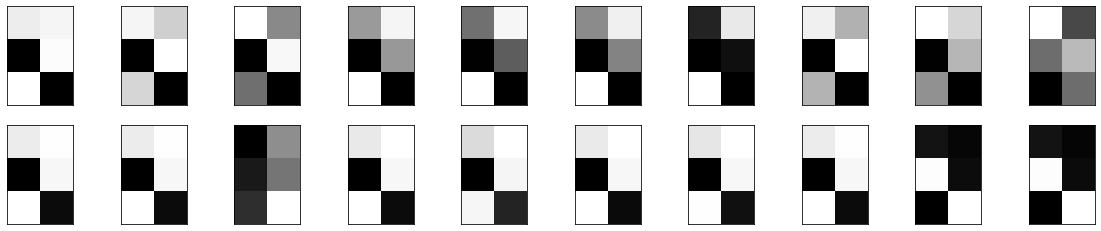

In [12]:
# sanity check when using the pictures dataset

import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(3, 2))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(3, 2))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()